In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,  roc_auc_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("cumu1.csv")

In [62]:
df

,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_duration,...,koiteqpos,koiteqneg,koinsolpos,koinsolneg,koisteffpos,koisteffneg,koisloggpos,koisloggneg,koisradpos,koisradneg
0,CONFIRMED,CANDIDATE,1.000,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2.95750,...,793,793,123.04,76.94,5536,5374,4.531,4.371,1.032,0.866
1,CONFIRMED,CANDIDATE,0.969,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,4.50700,...,443,443,11.98,7.49,5536,5374,4.531,4.371,1.032,0.866
2,CANDIDATE,CANDIDATE,0.000,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,1.78220,...,638,638,70.34,28.81,6011,5677,4.588,4.368,1.101,0.790
3,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,2.40641,...,1395,1395,1560.91,661.61,5962,5631,4.617,4.396,0.992,0.724
4,CONFIRMED,CANDIDATE,1.000,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,1.65450,...,1406,1406,1800.49,611.92,6200,5820,4.508,4.228,1.380,0.913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,3.22210,...,2088,2088,7906.91,3325.27,5777,5472,4.564,4.333,1.140,0.824
9560,CANDIDATE,CANDIDATE,0.497,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,3.11400,...,1608,1608,3123.67,1083.59,6284,5899,4.500,4.220,1.372,0.917
9561,FALSE POSITIVE,FALSE POSITIVE,0.021,0.681402,2.434000e-06,-2.434000e-06,132.181750,0.002850,-0.002850,0.86500,...,2218,2218,11389.15,3876.47,6366,5937,4.503,4.223,1.382,0.927
9562,CANDIDATE,CANDIDATE,0.092,333.486169,4.235000e-03,-4.235000e-03,153.615010,0.005070,-0.005070,3.19900,...,557,557,24.75,11.73,5028,4861,3.022,2.965,8.047,5.928


In [7]:
df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1',
       'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'koi_kepmag', 'koipos', 'koineg',
       'koiperpos', 'koiperneg', 'koitimepos', 'koitimeneg', 'koidurpos',
       'koidurneg', 'koidepthpos', 'koidepthneg', 'koipradpos', 'koipradneg',
       'koiteqpos', 'koiteqneg', 'koinsolpos', 'koinsolneg', 'koisteffpos',
       'koisteffneg', 'koisloggpos', 'koisloggneg', 'koisradpos',
       'koisradneg'],
      dtype='object')

In [63]:
# Remove the 'default_flag' column from the DataFrame
df = df.drop(columns=['koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1',
       'koi_time0bk_err2','koi_duration_err1',
       'koi_duration_err2','koi_depth_err1', 'koi_depth_err2','koi_prad_err1', 'koi_prad_err2','koi_teq_err1',
       'koi_teq_err2','koi_insol_err1', 'koi_insol_err2','koi_steff_err1', 'koi_steff_err2','koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'])
df.head()

,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,...,koiteqpos,koiteqneg,koinsolpos,koinsolneg,koisteffpos,koisteffneg,koisloggpos,koisloggneg,koisradpos,koisradneg
0,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,2.95750,615.8,2.26,793,93.59,...,793,793,123.04,76.94,5536,5374,4.531,4.371,1.032,0.866
1,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,4.50700,874.8,2.83,443,9.11,...,443,443,11.98,7.49,5536,5374,4.531,4.371,1.032,0.866
2,CANDIDATE,CANDIDATE,0.000,19.899140,175.850252,1.78220,10829.0,14.60,638,39.30,...,638,638,70.34,28.81,6011,5677,4.588,4.368,1.101,0.790
3,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,2.40641,8079.2,33.46,1395,891.96,...,1395,1395,1560.91,661.61,5962,5631,4.617,4.396,0.992,0.724
4,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,1.65450,603.3,2.75,1406,926.16,...,1406,1406,1800.49,611.92,6200,5820,4.508,4.228,1.380,0.913


In [46]:
df = df.drop(columns=["koi_disposition"])
df.head()

,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,...,koiteqpos,koiteqneg,koinsolpos,koinsolneg,koisteffpos,koisteffneg,koisloggpos,koisloggneg,koisradpos,koisradneg
0,CANDIDATE,1.000,9.488036,170.538750,2.95750,615.8,2.26,793,93.59,35.8,...,793,793,123.04,76.94,5536,5374,4.531,4.371,1.032,0.866
1,CANDIDATE,0.969,54.418383,162.513840,4.50700,874.8,2.83,443,9.11,25.8,...,443,443,11.98,7.49,5536,5374,4.531,4.371,1.032,0.866
2,CANDIDATE,0.000,19.899140,175.850252,1.78220,10829.0,14.60,638,39.30,76.3,...,638,638,70.34,28.81,6011,5677,4.588,4.368,1.101,0.790
3,FALSE POSITIVE,0.000,1.736952,170.307565,2.40641,8079.2,33.46,1395,891.96,505.6,...,1395,1395,1560.91,661.61,5962,5631,4.617,4.396,0.992,0.724
4,CANDIDATE,1.000,2.525592,171.595550,1.65450,603.3,2.75,1406,926.16,40.9,...,1406,1406,1800.49,611.92,6200,5820,4.508,4.228,1.380,0.913


In [64]:
df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_period',
       'koi_time0bk', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad',
       'koi_kepmag', 'koipos', 'koineg', 'koiperpos', 'koiperneg',
       'koitimepos', 'koitimeneg', 'koidurpos', 'koidurneg', 'koidepthpos',
       'koidepthneg', 'koipradpos', 'koipradneg', 'koiteqpos', 'koiteqneg',
       'koinsolpos', 'koinsolneg', 'koisteffpos', 'koisteffneg', 'koisloggpos',
       'koisloggneg', 'koisradpos', 'koisradneg'],
      dtype='object')

In [ ]:
label_encoder = LabelEncoder()
df['koi_disposition'] = label_encoder.fit_transform(df['koi_pdisposition'])




In [71]:
X = df[[ 'koi_score', 
       'koiperpos', 'koiperneg', 'koitimepos',
       'koitimeneg', 'koidurpos', 'koidurneg', 'koidepthpos', 'koidepthneg',
       'koipradpos', 'koipradneg', 'koinsolpos',
       'koinsolneg',  'koisloggpos',
       'koisloggneg', 'koisradpos', 'koisradneg']]
y = df["koi_pdisposition"]

In [73]:
SEED  = 23
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = SEED)

In [74]:
gbc = GradientBoostingClassifier(n_estimators=500,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 

In [75]:
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)

acc = accuracy_score(test_y, pred_y)

In [76]:
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))


Gradient Boosting Classifier accuracy is : 0.90


                precision    recall  f1-score   support

     CANDIDATE       0.94      0.84      0.89       940
FALSE POSITIVE       0.86      0.95      0.90       973

      accuracy                           0.90      1913
     macro avg       0.90      0.90      0.90      1913
  weighted avg       0.90      0.90      0.90      1913



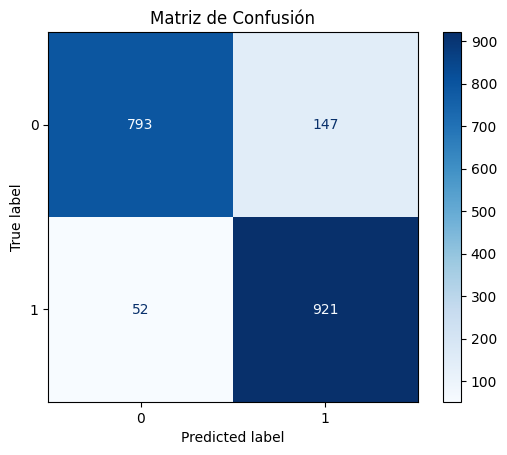

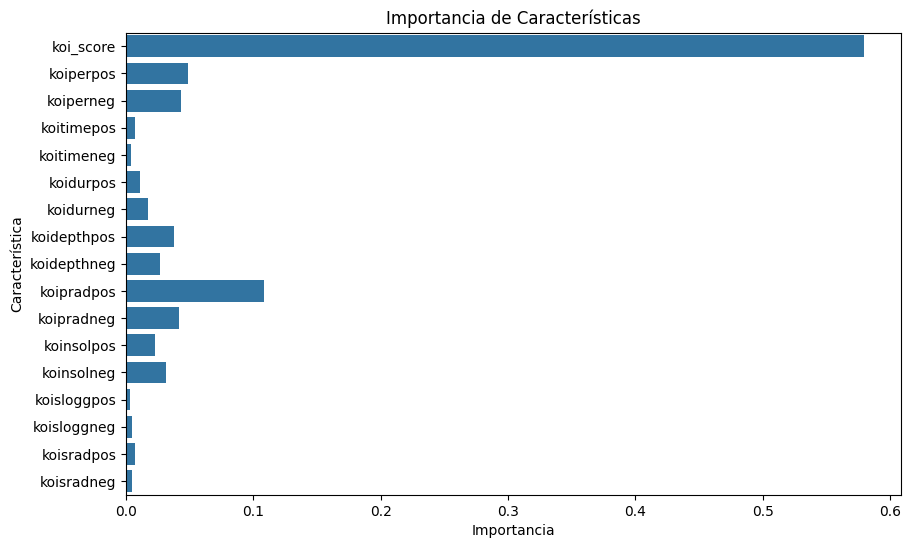

In [77]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Mostrar el reporte de clasificación
print(classification_report(test_y, pred_y))

# Matriz de confusión
cmp = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cmp)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Si quieres ver la importancia de las características:
importances = gbc.feature_importances_
features = train_X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Importancia de Características')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

# Obtener las probabilidades (CORRECTO, da las probabilidades para CADA clase)
y_pred_proba = gbc.predict_proba(test_X)

# Calcular y graficar una curva por clase:
for i in range(len(gbc.classes_)):
    # Curva PR para la Clase i (test_y_binarized[:, i] es 1 o 0)
    precision, recall, thresholds = precision_recall_curve(test_y[:, i], y_pred_proba[:, i])
    # ... luego calculas y graficas el F1-score para esta clase ...
    #plt.plot(..., label=f'Clase {gb_clf.classes_[i]}')

KeyError: 'key of type tuple not found and not a MultiIndex'